In [9]:
%cd /media/Storage_2/Sam
import compute as c
import pandas as pd
import numpy as np, matplotlib.pyplot as plt, pandas as pd
import random
import sys
all='ALL'

/media/Storage_2/Sam


In [2]:
%cd data/MA
MA_dict=c.make_df_dict('MA', [25,50,75,1,2,4,6,8], 4)

/media/Storage_2/Sam/data/MA
MA_E25_R1
MA_E25_R2
MA_E25_R3
MA_E25_R4
MA_E50_R1
MA_E50_R2
MA_E50_R3
MA_E50_R4
MA_E75_R1
MA_E75_R2
MA_E75_R3
MA_E75_R4
MA_E1_R1
MA_E1_R2
MA_E1_R3
MA_E1_R4
MA_E2_R1
MA_E2_R2
MA_E2_R3
MA_E2_R4
MA_E4_R1
MA_E4_R2
MA_E4_R3
MA_E4_R4
MA_E6_R1
MA_E6_R2
MA_E6_R3
MA_E6_R4
MA_E8_R1
MA_E8_R2
MA_E8_R3
MA_E8_R4


In [3]:
MA_dict=c.add_real_to_dict(MA_dict,'the_real_MA')

In [4]:
MA_dict[(25,1)]
MA_dict[(25,1)].TABBLKCOU.unique()

array([ 50,  30,  10, 110, 170, 250, 270, 230, 150, 130, 190,  70, 210,
        90])

In [18]:
def plot_stat_dict(sdict,mytitle,name):
    pdict={}
    eps=['0.25','0.5','0.75','1.0','2.0','4.0','6.0','8.0']
    for i in eps:
        pdict[i]=[]
    for key in sdict.keys():
        if key[0]==25:
            z='0.25'
        elif key[0]==50:
            z='0.5'
        elif key[0]==75:
            z='0.75'
        elif key[0]==1:
            z='1.0'
        elif key[0]==2:
            z='2.0'
        elif key[0]==4:
            z='4.0'
        elif key[0]==6:
            z='6.0'
        elif key[0]==8:
            z='8.0'
        elif key=='real':
            z= 'real'
        else:
            print('SOME DATA HAS WRONG KEY')
        if z!='real':
            current=pdict[z]
            current.append(sdict[key])
    print(pdict)
    theeps={}
    datapts={}
    done=False
    samp=0;
    while done==False:
        ceps=[]
        cdata=[]
        for eps in pdict.keys():
            if samp < len(pdict[eps]):
                ceps.append(eps)
                cdata.append(pdict[eps][samp])  
        if len(cdata)>0:
            datapts[samp]=cdata
            theeps[samp]=ceps
            samp+=1
        else:
            done=True
    aves={}
    for key in pdict.keys():
        aves[key]=np.mean(pdict[key])
    for i in range(samp):
        plt.scatter(theeps[i],datapts[i], marker='o', c='#1f77b4')
    plt.scatter(aves.keys(), aves.values(), marker='_', c='black')
    plt.xlabel('Privacy budget (epsilon)')
    plt.ylabel('Population reported')
    plt.title(mytitle)
    #add real line if real is in dictionary
    if 'real' in sdict.keys():
        z=sdict['real']
        plt.axhline(z, color='k', linestyle='--')
        plt.text(7.7, z, f'Exact Value: {z}', va='center', ha='left')
    
    #plt.scatter(eps,values)
    #for i in range(len(eps)):
        #plt.scatter([eps[i] for j in range(len(pdict[eps[i]]))], pdict[eps[i]])
    plt.grid()
    if name!= False:
        plt.savefig(name, bbox_inches='tight')
    return True

In [22]:
def plot_stat_dict_tthous(sdict,mytitle,name):
    pdict={}
    eps=['0.25','0.5','0.75','1.0','2.0','4.0','6.0','8.0']
    for i in eps:
        pdict[i]=[]
    for key in sdict.keys():
        if key[0]==25:
            z='0.25'
        elif key[0]==50:
            z='0.5'
        elif key[0]==75:
            z='0.75'
        elif key[0]==1:
            z='1.0'
        elif key[0]==2:
            z='2.0'
        elif key[0]==4:
            z='4.0'
        elif key[0]==6:
            z='6.0'
        elif key[0]==8:
            z='8.0'
        elif key=='real':
            z= 'real'
        else:
            print('SOME DATA HAS WRONG KEY')
        if z!='real':
            current=pdict[z]
            current.append(sdict[key])
    print(pdict)
    theeps={}
    datapts={}
    done=False
    samp=0;
    while done==False:
        ceps=[]
        cdata=[]
        for eps in pdict.keys():
            if samp < len(pdict[eps]):
                ceps.append(eps)
                cdata.append(pdict[eps][samp])  
        if len(cdata)>0:
            datapts[samp]=cdata
            theeps[samp]=ceps
            samp+=1
        else:
            done=True
    aves={}
    for key in pdict.keys():
        aves[key]=np.mean(pdict[key])
    for i in range(samp):
        plt.scatter(theeps[i],[j/1000 for j in datapts[i]], marker='o', c='#1f77b4')
    plt.scatter(aves.keys(), [i/1000 for i in aves.values()], marker='_', c='black')
    plt.xlabel('Privacy budget (epsilon)')
    plt.ylabel('Population reported (in thousands)')
    plt.title(mytitle)
    #add real line if real is in dictionary
    if 'real' in sdict.keys():
        z=sdict['real']
        plt.axhline(z/1000, color='k', linestyle='--')
        plt.text(7.7, z/1000, f'Exact Value: {z}', va='center', ha='left')
    
    #plt.scatter(eps,values)
    #for i in range(len(eps)):
        #plt.scatter([eps[i] for j in range(len(pdict[eps[i]]))], pdict[eps[i]])
    plt.grid()
    plt.ticklabel_format(style='plain', useOffset=False, axis='y')
    #plt.yaxis.set_major_formatter(mticker.ScalarFormatter())
    #plt.yaxis.get_major_formatter().set_scientific(False)
    #plt.yaxis.get_major_formatter().set_useOffset(False)
    if name!= False:
        plt.savefig(name, bbox_inches='tight')
    
    return True

In [12]:
plt.rcdefaults()

{'0.25': [0, 0, 0, 0], '0.5': [0, 8, 0, 0], '0.75': [0, 0, 35, 5], '1.0': [0, 0, 0, 0], '2.0': [0, 0, 1, 3], '4.0': [4, 1, 0, 0], '6.0': [12, 0, 1, 1], '8.0': [0, 0, 1, 0]}


True

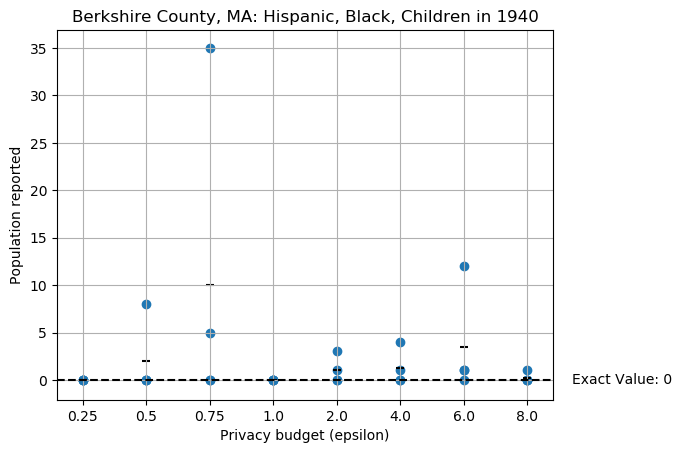

In [19]:
atts=[all, [30], all, all, [17], [2], [2]]
title='Berkshire County, MA: Hispanic, Black, Children in 1940'
sd= c.make_stat_dict(MA_dict,atts)
plot_stat_dict(sd ,title, 'CHBC.pdf')


{'0.25': [294, 410, 305, 335], '0.5': [318, 385, 330, 352], '0.75': [323, 312, 335, 360], '1.0': [309, 314, 324, 312], '2.0': [319, 317, 321, 319], '4.0': [326, 320, 311, 320], '6.0': [325, 321, 323, 321], '8.0': [319, 323, 326, 321]}


True

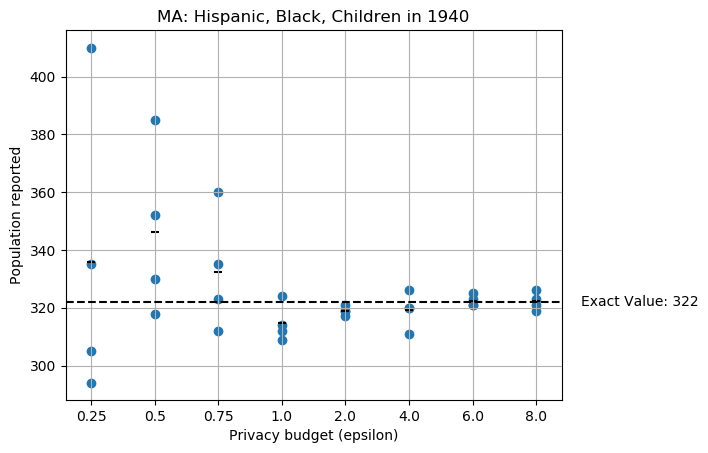

In [20]:
atts=[all, all, all, all, [17], [2], [2]]
title='MA: Hispanic, Black, Children in 1940'
sd= c.make_stat_dict(MA_dict,atts)
plot_stat_dict(sd ,title, 'SHBC.pdf')


{'0.25': [87927, 87945, 87945, 87954], '0.5': [87901, 87943, 87912, 87830], '0.75': [87916, 87942, 87928, 87929], '1.0': [87935, 87904, 87936, 87906], '2.0': [87911, 87913, 87922, 87926], '4.0': [87925, 87931, 87925, 87918], '6.0': [87921, 87922, 87925, 87922], '8.0': [87924, 87921, 87920, 87923]}


True

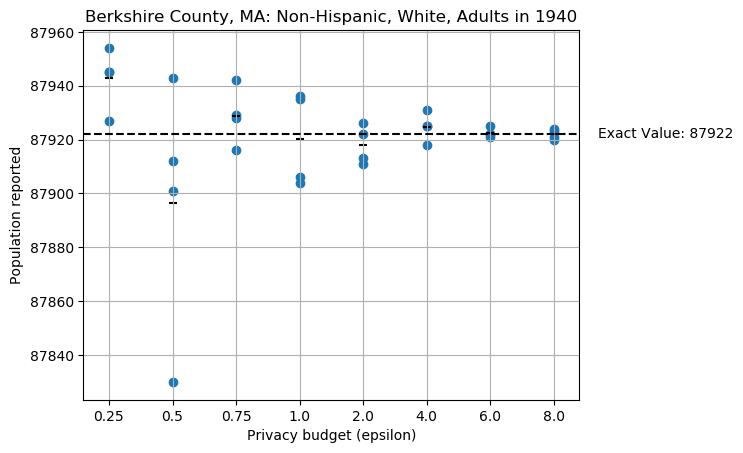

In [16]:
atts=[all, [30], all, all, [18], [1], [1]]
title='Berkshire County, MA: Non-Hispanic, White, Adults in 1940'
sd= c.make_stat_dict(MA_dict,atts)
plot_stat_dict(sd ,title, 'CNWA.pdf')


{'0.25': [3102757, 3102743, 3102754, 3102715], '0.5': [3102730, 3102741, 3102741, 3102728], '0.75': [3102729, 3102725, 3102721, 3102721], '1.0': [3102742, 3102743, 3102756, 3102734], '2.0': [3102729, 3102742, 3102732, 3102746], '4.0': [3102739, 3102735, 3102736, 3102729], '6.0': [3102729, 3102739, 3102740, 3102736], '8.0': [3102739, 3102739, 3102736, 3102737]}


True

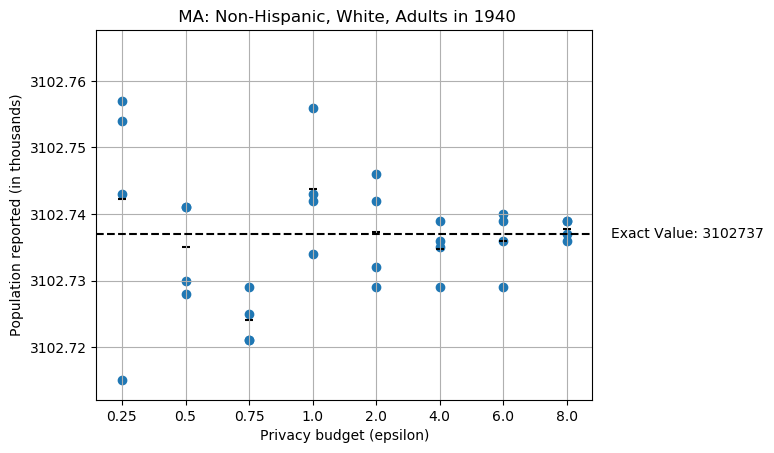

In [23]:
atts=[all, all, all, all, [18], [1], [1]]
title=' MA: Non-Hispanic, White, Adults in 1940'
sd= c.make_stat_dict(MA_dict,atts)
plot_stat_dict_tthous(sd ,title, 'SNWA.pdf')


In [18]:
#berkshire 3, middlesex 17
MA_dict[(25,1)].TABBLKCOU.unique()

array([ 50,  30,  10, 110, 170, 250, 270, 230, 150, 130, 190,  70, 210,
        90])

In [23]:

x=MA_dict[(25,1)].ENUMDIST.unique()
x.sort()
x

array([  10,   11,   12,   13,   20,   30,   40,   50,   51,   52,   60,
         70,   80,   90,  100,  101,  102,  110,  120,  130,  140,  141,
        142,  150,  151,  152,  160,  161,  162,  170,  180,  190,  200,
        210,  211,  212,  220,  230,  240,  250,  260,  270,  280,  290,
        300,  310,  320,  330,  340,  350,  360,  370,  380,  390,  400,
        410,  420,  430,  431,  432,  440,  450,  460,  470,  480,  490,
        500,  510,  511,  512,  520,  530,  540,  550,  560,  570,  580,
        590,  600,  610,  620,  630,  640,  650,  660,  670,  680,  690,
        700,  710,  720,  730,  740,  750,  760,  770,  780,  790,  800,
        810,  820,  821,  822,  830,  840,  841,  842,  850,  860,  870,
        880,  881,  882,  890,  900,  901,  902,  910,  920,  930,  940,
        950,  951,  952,  960,  970,  971,  972,  980,  990, 1000, 1010,
       1020, 1021, 1022, 1023, 1030, 1040, 1050, 1060, 1070, 1080, 1090,
       1100, 1110, 1120, 1130, 1140, 1150, 1160, 11

In [ ]:
atts=[all, all, all, [3], all, all, all]
title='MA 1940: GQ p'
sd= c.make_stat_dict(MA_dict,atts)
c.plot_stat_dict(sd ,title)

In [13]:
county_race=c.make_entire_race_county_dict(MA_dict)

In [37]:
def make_entire_race_county_dict_abs(df):
    entire=dict.fromkeys(df.keys())
    for key in entire.keys():
        entire[key]=make_race_county_dict_abs(df[key])
    return entire

def make_race_county_dict_abs(df):
    adict=dict.fromkeys(df.TABBLKCOU.unique())
    for key in adict.keys():
        area=df[df.TABBLKCOU==key]
        tot=len(area)
        white=len(area[area.CENRACE==1])
        black=len(area[area.CENRACE==2])
        adict[key]=(white, black)
    return adict

In [39]:
county_race=make_entire_race_county_dict_abs(MA_dict)

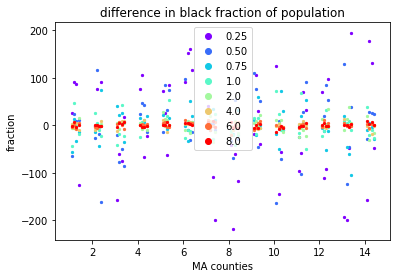

In [41]:
#c.plot_race_frac_by_county(county_race, 'white', 'MA')
c.plot_diff_in_race_frac_by_county(county_race, 'black', 'MA')

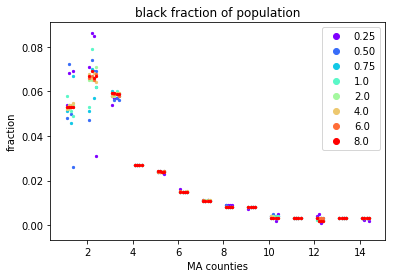

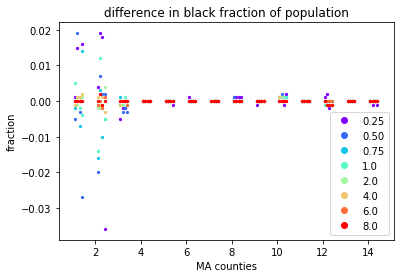

In [15]:
c.plot_race_frac_by_county(county_race, 'black', 'MA')
c.plot_diff_in_race_frac_by_county(county_race, 'black', 'MA')

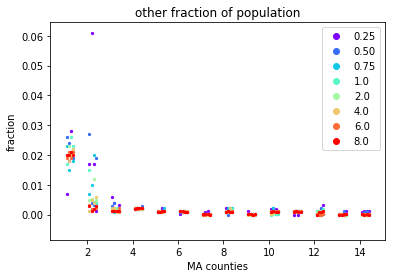

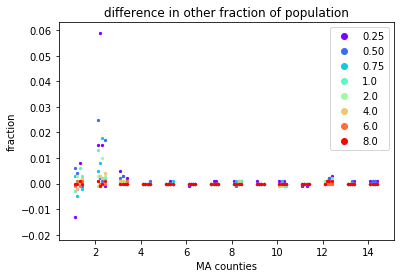

In [16]:
c.plot_race_frac_by_county(county_race, 'other', 'MA')
c.plot_diff_in_race_frac_by_county(county_race, 'other', 'MA')